In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
# Data from https://www.ncsbe.gov/results-data/voter-registration-data
# Downloaded 11/7/25

## Load the Watauga and NC datasets

In [275]:
file = 'ncvoter95.txt'

wat_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year', 'status_cd', 'precinct_desc'],
    encoding="latin-1",  
)

wat_df = wat_df[wat_df['status_cd'] == 'A']
wat_df.count()

status_cd        38054
zip_code         38050
registr_dt       38054
race_code        38054
ethnic_code      38054
party_cd         38054
gender_code      38054
birth_year       38054
precinct_desc    38054
dtype: int64

In [3]:
wat_df['precinct_desc'].unique()

array(['BOONE 2', 'BEECH MOUNTAIN', 'NEW RIVER I', 'BRUSHY FORK',
       'LAUREL CREEK', 'NEW RIVER II', 'BLUE RIDGE', 'STONY FORK',
       'BOONE 3', 'BOONE 1', 'NEW RIVER III', 'BLOWING ROCK', 'MEAT CAMP',
       'WATAUGA', 'COVE CREEK', 'BALD MOUNTAIN', 'BEAVER DAM',
       'SHAWNEEHAW', 'ELK', 'NORTH FORK'], dtype=object)

In [4]:
wat_empty = (wat_df['precinct_desc'].isna() | (wat_df['precinct_desc'] == '')).sum()
wat_empty.sum()

0

In [ ]:
file = 'ncvoter_Statewide.txt'

nc_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year', 'status_cd', 'precinct_desc'],
    encoding="latin-1",   
)

nc_df = nc_df[nc_df['status_cd'] == 'A']
nc_df.count()

In [ ]:
nc_df['precinct_desc'].unique()

In [ ]:
nc_na = nc_df['precinct_desc'].isna() 
nc_empty = (nc_df['precinct_desc'] == '').sum()
print(nc_na.sum())
print(nc_empty.sum())

## Clean and filter Watauga dataset

In [276]:
wat_df = wat_df[wat_df['registr_dt'] != '##/##/####']
wat_df['registr_dt'] = pd.to_datetime(wat_df['registr_dt'])
wat_df = wat_df.set_index('registr_dt')

wat_df_asc = wat_df.sort_index(ascending=True)

In [6]:
wat_df_asc.head()

,status_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc
registr_dt,,,,,,,,
1964-10-08,A,28692.0,W,NL,REP,M,1944,COVE CREEK
1968-08-02,A,28692.0,W,NL,REP,M,1938,BEAVER DAM
1968-11-11,A,28607.0,W,NL,REP,F,1940,MEAT CAMP
1969-07-12,A,28607.0,W,NL,UNA,M,1938,BLUE RIDGE
1969-07-12,A,28618.0,W,NL,REP,M,1945,ELK


In [278]:
wat_current = wat_df_asc.loc['2025-08-01':]
wat_past = wat_df_asc.loc['2023-08-01':'2023-11-07']
percent = (len(wat_past) - len(wat_current)) / len(wat_past)
print(f'The 2023 Watauga election had a registration count of {len(wat_past)}, while the 2025 election cycle ' +
      f'had a registration count of {len(wat_current)}; a {percent:.1%} decrease.')

The 2023 Watauga election had a registration count of 1750, while the 2025 election cycle had a registration count of 1574; a 10.1% decrease.


## Clean and filter NC dataset

In [ ]:
nc_df = nc_df[nc_df['registr_dt'] != '##/##/####']
nc_df['registr_dt'] = pd.to_datetime(nc_df['registr_dt'])
nc_df = nc_df.set_index('registr_dt')

nc_df_asc = nc_df.sort_index(ascending=True)

In [ ]:
nc_current = nc_df_asc.loc['2025-08-01':]
nc_past = nc_df_asc.loc['2023-08-01':'2023-11-07']
percent = (len(nc_past) - len(nc_current)) / len(nc_past)
print(f'The 2023 NC election had a new registration count of {len(nc_past)}, while the 2025 election cycle ' +
      f'had a registration count of {len(nc_current)}; a {percent:.1%} decrease.')

## Group-by-precinct Watauga Dataset

In [ ]:
# pd.set_option('display.max_rows', None)


# wat_df = wat_current[['precinct_desc', 'race_code']]

# wat_pre = wat_df.groupby(['precinct_desc', 'race_code']).size()

# wat_df = pd.DataFrame(wat_pre)
# wat_df

In [ ]:
wat_df = wat_current[['precinct_desc', 'race_code']]

wat_pre = wat_df.groupby(['precinct_desc', 'race_code']).size().reset_index(name='count')

wat_pre

# wat_df.groupby('precinct_desc').sum() >= 100

In [ ]:
wat_current.head()

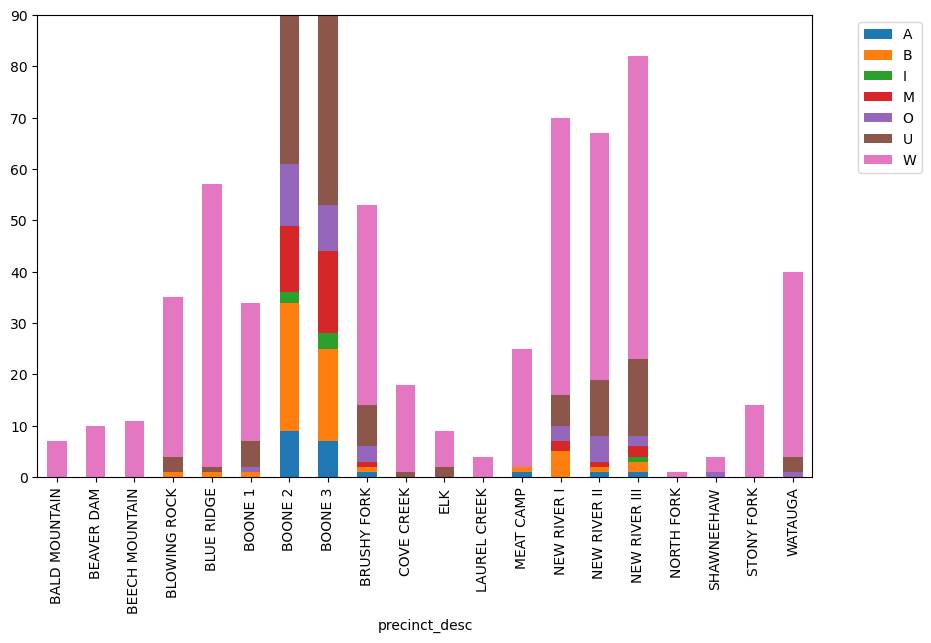

In [8]:
wat_current.groupby(['precinct_desc','race_code']).size().unstack('race_code').plot(kind = 'bar', ylim=(0, 90), stacked = True, figsize=(10, 6))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [9]:
wat_current.groupby(['precinct_desc','race_code']).size().unstack('race_code')

race_code,A,B,I,M,O,U,W
precinct_desc,,,,,,,
BALD MOUNTAIN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
BEAVER DAM,NaN,NaN,NaN,NaN,NaN,NaN,10.0
BEECH MOUNTAIN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
BLOWING ROCK,NaN,1.0,NaN,NaN,NaN,3.0,31.0
BLUE RIDGE,NaN,1.0,NaN,NaN,NaN,1.0,55.0
BOONE 1,NaN,1.0,NaN,NaN,1.0,5.0,27.0
BOONE 2,9.0,25.0,2.0,13.0,12.0,145.0,361.0
BOONE 3,7.0,18.0,3.0,16.0,9.0,115.0,298.0
BRUSHY FORK,1.0,1.0,NaN,1.0,3.0,8.0,39.0


## Plots!

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

nc_past['party_cd'].value_counts().plot.bar(ax = axes[0,0], ylim=(0, 70000), color = ['grey', 'red', 'blue', 'green'], title = '2023 NC Party', rot = 0)
nc_current['party_cd'].value_counts().plot.bar(ax = axes[0,1], ylim=(0, 70000), color = ['grey', 'red', 'blue', 'green'], title = '2025 NC Party', rot = 0)

wat_past['party_cd'].value_counts().plot.bar(ax = axes[1,0], ylim=(0, 1200), color = ['grey', 'blue', 'red', 'green'], title = '2023 WAT Party', rot = 0)
wat_current['party_cd'].value_counts().plot.bar(ax = axes[1,1], ylim=(0, 1200), color = ['grey', 'blue', 'red', 'green'], title = '2023 WAT Party', rot = 0)

plt.tight_layout(h_pad=3.0) 


In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

nc_past['gender_code'].value_counts().plot.bar(ax = axes[0,0], ylim=(0, 61000), color = ['hotpink', 'blue', 'grey'], title = '2023 NC Gender', rot = 0)
nc_current['gender_code'].value_counts().plot.bar(ax = axes[0,1], ylim=(0, 61000), color = ['hotpink', 'blue', 'grey'], title = '2025 NC Gender', rot = 0)

wat_past['gender_code'].value_counts().plot.bar(ax = axes[1,0], ylim=(0, 1100), color = ['hotpink', 'blue', 'grey'], title = '2023 WAT Gender', rot = 0)
wat_current['gender_code'].value_counts().plot.bar(ax = axes[1,1], ylim=(0, 1100), color = ['hotpink', 'blue', 'grey'], title = '2025 WAT Gender', rot = 0)

plt.tight_layout(h_pad=3.0) 


In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

nc_past['race_code'].value_counts().plot.bar(ax = axes[0,0], ylim=(0, 80000), color = ['whitesmoke', 'black', 'grey', 'green'], edgecolor='black', title = '2023 NC Race', rot = 0)
nc_current['race_code'].value_counts().plot.bar(ax = axes[0,1], ylim=(0, 80000), color = ['whitesmoke', 'grey', 'black', 'green'], edgecolor='black', title = '2025 NC Race', rot = 0)

wat_past['race_code'].value_counts().plot.bar(ax = axes[1,0], ylim=(0, 1600), color = ['whitesmoke', 'grey', 'black', 'green'], edgecolor='black', title = '2023 WAT Race', rot = 0)
wat_current['race_code'].value_counts().plot.bar(ax = axes[1,1], ylim=(0, 1600), color = ['whitesmoke', 'grey', 'black', 'green'], edgecolor='black', title = '2025 WAT Race', rot = 0)

plt.tight_layout(h_pad=3.0) 


In [ ]:
# Explore UNA data

una_nc_past = nc_past[nc_past['party_cd'] == 'UNA']
una_nc_current = nc_current[nc_current['party_cd'] == 'UNA']

una_wat_past = wat_past[wat_past['party_cd'] == 'UNA']
una_wat_current = wat_current[wat_current['party_cd'] == 'UNA']


## Function time!!

In [ ]:
nc_current = nc_df_asc.loc['2025-08-01':]
nc_past = nc_df_asc.loc['2023-08-01':'2023-11-07']
percent = (len(nc_past) - len(nc_current)) / len(nc_past)
print(f'The 2023 NC election had a new registration count of {len(nc_past)}, while the 2025 election cycle ' +
      f'had a registration count of {len(nc_current)}; a {percent:.1%} decrease.')

In [361]:
data_df = {
    '2023': wat_past['party_cd'].value_counts(),
    '2025': wat_current['party_cd'].value_counts()
}

party_df = pd.DataFrame(data_df)
party = party_df.T

# Create an empty pct_chg df for analysis
pct_chg = pd.DataFrame()

thresh = 20
# Input data from above filtered df into the empty pct_chg df to get the pct_chg from two different time periods
for col in party:
    pct_chg[col] = party[col].pct_change() * 100
    
# Adds the pct_chg values to the dataset for analysis
party.loc['pct_change'] = pct_chg.iloc[-1]

party = party.T
party

fil_df = party[abs(party['pct_change']) > thresh]

# print(f"The 2025 election had a {fil_df['pct_change'].iloc[0]:.2f}% change in {fil_df.index[0]}, " +
#     f"compared to 2023.")
statements = []
for index, row in fil_df.iterrows():
    statement = f"The {current.index.year.unique().item()} election had a {row['pct_change']:.2f}% change in {row.name}, compared to {past.index.year.unique().item()}."
    statements.append(statement)

for s in statements:
    print(s)
# print(f"The {current.index.year.unique().item()} election had a {row['pct_change']:.2f}% change in {row.index[0]}, " +
#     f"compared to {past.index.year.unique().item()}.")


The 2025 election had a -24.90% change in DEM, compared to 2023.
The 2025 election had a -26.09% change in LIB, compared to 2023.
The 2025 election had a -66.67% change in GRE, compared to 2023.


In [369]:
from datetime import date

def compare_df(df, col, start1, end1, start2, end2, thresh):
    
    # Filter df by date range desired
    current = df.loc[start1:end1]
    past = df.loc[start2:end2]
   
    # creates a dataset based on above filtered data
    data = {
        f'{current.index.year.unique().item()}': current[col].value_counts(),
        f'{past.index.year.unique().item()}' : past[col].value_counts()
    }
    
    # Create a df from above dataset
    df = pd.DataFrame(data)
    df = df.T
    
    # Create an empty pct_chg df for analysis
    pct_chg = pd.DataFrame()

    thresh = thresh
    # Input data from above filtered df into the empty pct_chg df to get the pct_chg from two different time periods
    for col in df:
        pct_chg[col] = df[col].pct_change() * 100
    
    # Adds the pct_chg values to the dataset for analysis
    df.loc['pct_change'] = pct_chg.iloc[-1]
    
    df = df.T
    df

    fil_df = df[abs(df['pct_change']) > thresh]

    statements = []
    for index, row in fil_df.iterrows():
        statement = f"The {past.index.year.unique().item()} election had a {row['pct_change']:.2f}% change in {row.name}, compared to {current.index.year.unique().item()}."
        statements.append(statement)

    for s in statements:
        print(s)
    

In [374]:
compare_df(wat_df_asc, 'race_code', date(2023, 8, 1), date(2023, 11, 7), date(2025, 8, 1), date(2025, 11, 7), 1)
#df['UNA'].iloc[-1]



The 2025 election had a -21.58% change in W, compared to 2023.
The 2025 election had a 89.76% change in U, compared to 2023.
The 2025 election had a 1.82% change in B, compared to 2023.
The 2025 election had a -15.91% change in O, compared to 2023.
The 2025 election had a -14.63% change in M, compared to 2023.
The 2025 election had a -37.50% change in A, compared to 2023.
The 2025 election had a 100.00% change in I, compared to 2023.
